# Get and check Data

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
# get raw unprocessed data
dataset = pd.read_csv('spambase.data')
datanames = open('spambase.names', 'r')
num_attr = dataset.shape[1]
dataset

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


### Title Attributes
The dataset intepreted by pandas is misaligned,
with the column label being the features of the first email rather than its official labels

In [3]:
# extracting keys for each column of the data
def get_keys(datanames):
    """
    Function which gets the column labels (attributes) from datanames file
    Args:
        datanames:   file object (Can be any string iterable)
    
    Return:
        keys:    list
    """
    keys = []

    for line in datanames:
        line = re.match(r"^(word|char|cap)",line)
        if line:
            line = line.string # convert back into string
            attribute = re.split(r'\s+', line)[0]
            keys.append(attribute)


    # last attribute is whether email is spam or not
    keys.append("is_spam:")
    return keys

datanames = list(datanames)
copy_datanames = datanames[:] # makes a copy of datanames as get_keys function seems to modify the input

keys = get_keys(copy_datanames)
#  appends attribute/column keys onto raw dataset dataframe
labelled_dataset = pd.DataFrame(data=dataset.to_numpy(), columns=keys) 
labelled_dataset


,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,is_spam:
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3.0,88.0,0.0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4.0,14.0,0.0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6.0,118.0,0.0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5.0,78.0,0.0


In [4]:
# check how many null values in data
num_nulls = labelled_dataset.isnull().sum()

# for loop which checks whether there is a any null fields
for nulls in num_nulls:
    if 0:
        print("Data not properly processed")

num_nulls

word_freq_make:                0
word_freq_address:             0
word_freq_all:                 0
word_freq_3d:                  0
word_freq_our:                 0
word_freq_over:                0
word_freq_remove:              0
word_freq_internet:            0
word_freq_order:               0
word_freq_mail:                0
word_freq_receive:             0
word_freq_will:                0
word_freq_people:              0
word_freq_report:              0
word_freq_addresses:           0
word_freq_free:                0
word_freq_business:            0
word_freq_email:               0
word_freq_you:                 0
word_freq_credit:              0
word_freq_your:                0
word_freq_font:                0
word_freq_000:                 0
word_freq_money:               0
word_freq_hp:                  0
word_freq_hpl:                 0
word_freq_george:              0
word_freq_650:                 0
word_freq_lab:                 0
word_freq_labs:                0
word_freq_

# Split data into training data and testing data

In [5]:
# seperate features from result
X = labelled_dataset.iloc[:,:57] # features array 
y = labelled_dataset.iloc[:,57] # this is a binary array(result of whether email is spam or not)

In [6]:
#  splitting of data into Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Machine Learning

###  using randomForestClassifier

In [7]:
# using randomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30)
rfc = rfc.fit(X_train, y_train)
pred_clf = rfc.predict(X_test)
pred_clf[:20]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0.])

In [31]:
# function for processing and printing 2 x 2 confusion matrix
def print_confusionMat(matrix):
    print("Number of not spam emails identified as not spam: ", matrix[0][0])
    print("Number of not spam emails identified as spam: ", matrix[0][1])
    print("Number of spam emails identified as not spam: ", matrix[1][0])
    print("Number of spam emails identified as spam: ", matrix[1][1])

In [33]:
# check performance of ml model
print(classification_report(y_test, pred_clf))
confuseMat = confusion_matrix(y_test, pred_clf)
print_confusionMat(confuseMat)
print("Confusion matrix: \n", confuseMat)

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       530
         1.0       0.86      0.89      0.88       390

    accuracy                           0.89       920
   macro avg       0.89      0.89      0.89       920
weighted avg       0.90      0.89      0.89       920

Number of not spam emails identified as not spam:  475
Number of not spam emails identified as spam:  55
Number of spam emails identified as not spam:  42
Number of spam emails identified as spam:  348
Confusion matrix: 
 [[475  55]
 [ 42 348]]


In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
probabilities = rfc.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])


0.9775544267053702

Text(0, 0.5, 'True Positive Rate')

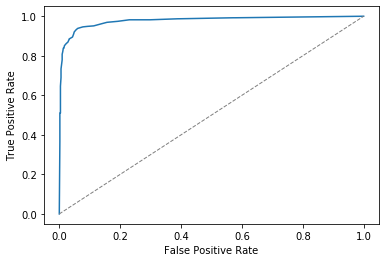

In [11]:
probabilities = rfc.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])
fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Using Decision Tree

In [35]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)
pred_clf[:20]

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0.])

In [36]:
# check performance of ml model
print(classification_report(y_test, pred_clf))
confuseMat = confusion_matrix(y_test, pred_clf)
print_confusionMat(confuseMat)

print("Confusion matrix: \n", confuseMat)

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       530
         1.0       0.93      0.89      0.91       390

    accuracy                           0.93       920
   macro avg       0.93      0.92      0.92       920
weighted avg       0.93      0.93      0.93       920

Number of not spam emails identified as not spam:  505
Number of not spam emails identified as spam:  25
Number of spam emails identified as not spam:  42
Number of spam emails identified as spam:  348
Confusion matrix: 
 [[505  25]
 [ 42 348]]


Text(0, 0.5, 'True Positive Rate')

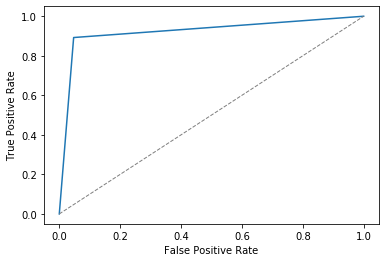

In [37]:
probabilities = clf.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])
fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### using neural network
IMPORTANT: still a work in progress, isn't as accurate as non neural nets

In [15]:
# using neural network
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(num_attr, num_attr, num_attr), random_state=1)

# convert X_train array into double in order to use MLPClassifier
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)


clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)
pred_clf[:20]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 0.])

In [16]:
# check performance of ml model
print(classification_report(y_test, pred_clf))
confuseMat = confusion_matrix(y_test, pred_clf)
print_confusionMat(confuseMat)
print("Confusion matrix: \n", confuseMat)

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       530
         1.0       0.86      0.89      0.88       390

    accuracy                           0.89       920
   macro avg       0.89      0.89      0.89       920
weighted avg       0.90      0.89      0.89       920

Number of spam emails identified as spam:  475
Number of spam emails identified as not spam:  55
Number of not spam emails identified as spam:  42
Number of not spam emails identified as not spam:  348
Confusion matrix: 
 [[475  55]
 [ 42 348]]


probabilities = clf.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])
fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'True Positive Rate')

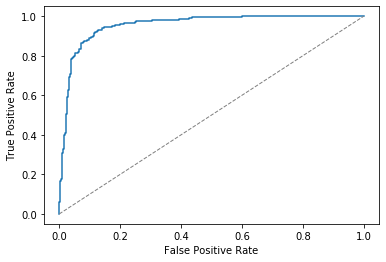

In [17]:
probabilities = clf.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])
fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Actually predicting Spam mails

In [47]:
def get_features(email):
    """
    Given the content of a email in string form, return it's feature array
    
    """
    datanames = open('spambase.names', 'r')
    keys = get_keys(datanames)
    
    freq_dict = {}
    # build dictionary to count key words and characters
    for key in keys:
        if "word_" in key:
            # remove word_freq_ and :
            key = key[10:]
            key = key[0:-1]
        elif "char_" in key:
            # remove char_freq_ and :
            key = key[10:]
            key = key[0:-1]
        freq_dict[key] = 0
        
    # get word count freq
    words = email.split()
    num_words = len(words)
    for word in words:
        if freq_dict.get(word) is not None:
            freq_dict[word] += 1
    
    
    # normalise word freq
    for key, value in freq_dict.items():
        # since all values that are not words are zero, we can do calculation on everything
        freq_dict[key] = round(100 * value / num_words, 2)
    
    
    # get character count for special characters and capital letter information
    num_caps = 0
    num_cap_seq = 0 # number of sequences of capital letters (i.e. ABCD <- is a sequence of caps)
    longest_cap = 0
    curr_cap = 0
    specialChars = ";([!$#"
    for char in email:
        # if character is uppercase, 
        if char.isupper():
            num_caps += 1
            curr_cap += 1
            if curr_cap > longest_cap:
                longest_cap = curr_cap
        else:
            # not capital
            if curr_cap != 0:    
                # check whether previous is capital by checking whether 
                num_cap_seq += 1
                curr_cap = 0
                
        if char not in specialChars:
            continue
        if freq_dict.get(char) is not None:
            freq_dict[char] += 1
    
    # normalise special char's freq
    for char in specialChars:
        freq_dict[char] = round(100 * freq_dict[char] / len(email), 2)
    
    # if curr_cap is a non-zero number, an extra seq must be added
    if curr_cap != 0:
        num_cap_seq += 1
    
    freq_dict["capital_run_length_average:"] = round(num_caps / num_cap_seq,3)
    freq_dict["capital_run_length_longest:"] = longest_cap
    freq_dict["capital_run_length_total:"] = num_caps
    
    # match dictionary with keys lists
    i = 0
    for key, value in freq_dict.items():
        keys[i] = value
        i += 1

    # remove the result index (is_spam:)
    keys.pop(-1)
    return keys   


def predict_spam(email):
    """
    Given the entire content of an email (string) return whether it is a spam or not
    Calculations are based on the spambase.names file
    """
    features = get_features(email)
    pred_clf = rfc.predict([features])
    print(pred_clf[0])
    if pred_clf[0] == 1:
        print("Is Spam")
    else:
        print("Not Spam")

In [51]:
predict_spam("""Hi
Big fan of your show
love ya,
your bff""")

0.0
Not Spam
